<a href="https://colab.research.google.com/github/abhi01n/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# Importing library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import warnings; warnings.simplefilter('ignore')

#Reading Data into Pandas DataFrame and Data summary




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading Data into Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/NYC Taxi Trip Time Prediction- Abhinandan Kumar/NYC Taxi Data.csv")
print("Dataset size")
print("Rows {} Columns {}".format(df.shape[0], df.shape[1]))

Dataset size
Rows 1458644 Columns 11


Now let’s see what are those 11 columns.

In [ ]:
df.head()

id  vendor_id  ... store_and_fwd_flag trip_duration
0  id2875421          2  ...                  N           455
1  id2377394          1  ...                  N           663
2  id3858529          2  ...                  N          2124
3  id3504673          2  ...                  N           429
4  id2181028          2  ...                  N           435

[5 rows x 11 columns]

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

Let us now look at the datatypes of all these columns.

In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’.
vendor_id, passenger_count, and trip_duration are of type int.
pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.

##Let us see if there are any null values in our dataset.

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no null values in this dataset

##Let us check for unique values of all columns.

In [ ]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

1. We see that id has 1458644 unique values which are equal to the number of rows in our dataset.
2. There are 2 unique vendor ids.
3. There are 9 unique passenger counts.
4. There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

##Statistical summary

In [ ]:
df.describe()

vendor_id  passenger_count  ...  dropoff_latitude  trip_duration
count  1.458644e+06     1.458644e+06  ...      1.458644e+06   1.458644e+06
mean   1.534950e+00     1.664530e+00  ...      4.075180e+01   9.594923e+02
std    4.987772e-01     1.314242e+00  ...      3.589056e-02   5.237432e+03
min    1.000000e+00     0.000000e+00  ...      3.218114e+01   1.000000e+00
25%    1.000000e+00     1.000000e+00  ...      4.073588e+01   3.970000e+02
50%    2.000000e+00     1.000000e+00  ...      4.075452e+01   6.620000e+02
75%    2.000000e+00     2.000000e+00  ...      4.076981e+01   1.075000e+03
max    2.000000e+00     9.000000e+00  ...      4.392103e+01   3.526282e+06

[8 rows x 7 columns]

1. vendor id has a minimum value of 1 and maximum value 2 which makes sense as vender id has two values 1 and 2.
2. passenger count has minimum value 0 that's look like an error.
3. Minimum trip duration is quite low.

#Visualise observation on map



In [ ]:
import folium

In [ ]:
nyc = folium.Map(location=(40.730610, -73.935242), zoom_start=10)

In [ ]:
nyc

In [ ]:
for i in df.index[:1000]:
  folium.CircleMarker(location=[df['pickup_latitude'][i],df['pickup_longitude'][i]], color = 'green').add_to(nyc)

In [ ]:
nyc

In [ ]:
for i in df.index[:1000]:
  folium.CircleMarker(location=[df['dropoff_latitude'][i],df['dropoff_longitude'][i]], color = 'red').add_to(nyc)

In [ ]:
nyc

Text(0.5, 1.0, 'Drop-off Location')

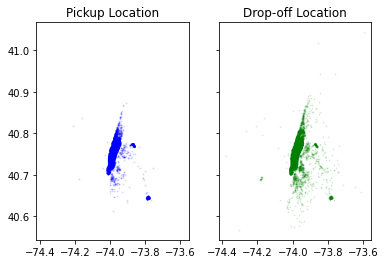

In [ ]:
N=10000
nyc_long_border = (-75,-75)
nyc_latitude_border = (40,40)
fig, ax = plt.subplots(ncols=2,sharex=True,sharey=True)
ax[0].scatter(df['pickup_longitude'].values[:N],df['pickup_latitude'].values[:N],color='blue',s=1,label='Pickup location',alpha=0.1)
ax[0].set_title("Pickup Location")
ax[1].scatter(df['dropoff_longitude'].values[:N],df['dropoff_latitude'].values[:N],color='green',s=1,label='Drop-off location',alpha=0.1)
ax[1].set_title("Drop-off Location")

#Features creation

1. Day hour
2. distance
3. Weekday
4. Month
5. morning, evening 
6. passenger count ( less impact)
7. pickup and dropoff location
8. speed

Remember pickup_datetime and dropoff_datetime were both of type object.we'll convert it to datetime object so that we get some information out of it.

In [ ]:
#Converting datetime format to fetch the other details
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


##Now, let us extract and create new features from this datetime features we just created.

In [ ]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

contain the information about the name of the day on which ride was taken.

In [ ]:
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday

contain the day number like monday = 0 and tuesday = 1

In [ ]:
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

contains day with 24 hours format

In [ ]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

Next, I have defined a function that lets us determine what time of the day the ride was taken. I have created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [ ]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
df['pickup_timeof_day'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_timeof_day'] = df['dropoff_hour'].apply(time_of_day)

##distance

In [ ]:
from geopy.distance import great_circle

In [ ]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [ ]:
df.head()

id  vendor_id  ... dropoff_timeof_day  distance
0  id2875421          2  ...            Evening  1.498523
1  id2377394          1  ...         Late night  1.805510
2  id3858529          2  ...          Afternoon  6.385108
3  id3504673          2  ...            Evening  1.485501
4  id2181028          2  ...          Afternoon  1.188590

[5 rows x 22 columns]

In [ ]:
df.describe()

vendor_id  passenger_count  ...  dropoff_month      distance
count  1.458644e+06     1.458644e+06  ...   1.458644e+06  1.458644e+06
mean   1.534950e+00     1.664530e+00  ...   3.517178e+00  3.440869e+00
std    4.987772e-01     1.314242e+00  ...   1.681217e+00  4.296544e+00
min    1.000000e+00     0.000000e+00  ...   1.000000e+00  0.000000e+00
25%    1.000000e+00     1.000000e+00  ...   2.000000e+00  1.231838e+00
50%    2.000000e+00     1.000000e+00  ...   4.000000e+00  2.093720e+00
75%    2.000000e+00     2.000000e+00  ...   5.000000e+00  3.875343e+00
max    2.000000e+00     9.000000e+00  ...   7.000000e+00  1.240910e+03

[8 rows x 14 columns]

1. Minimum value of distance is quite low
2. Max value is far away from the rest of the values
3. i'm going to remove these value from the data

#**Exploratory Data Analysis**
##Univariate Analysis

The univariate analysis involves studying patterns of all variables individually.

**Target Variable**

Let us start by analyzing the target variable.

## Trip duration

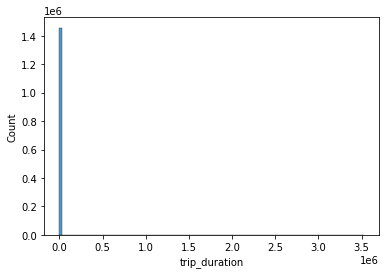

In [ ]:
sns.histplot(df['trip_duration'],kde=False,bins=100)

The histogram is right skewed. let's look at the box plot

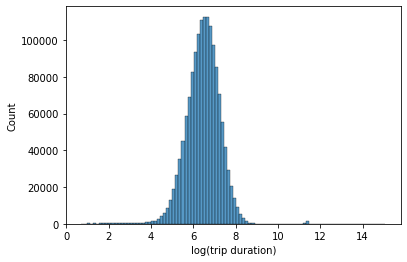

In [ ]:
sns.histplot(np.log(df['trip_duration']+1),kde=False,bins=100)
plt.xlabel('log(trip duration)')
plt.show()

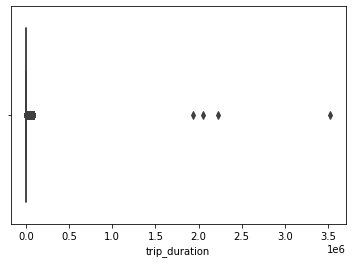

In [ ]:
sns.boxplot(df['trip_duration'])

so we can see 4 outliers.

In [ ]:
df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
1034341          1
346102           1
1360664          1
1382872          1
207497           1
Name: trip_duration, Length: 1458644, dtype: int64

so let's drop these outliers from dataset.

In [ ]:
df.drop(df[df['trip_duration']== 3526282].index, inplace=True)
df.drop(df[df['trip_duration']== 2227612].index, inplace=True)
df.drop(df[df['trip_duration']== 2049578].index, inplace=True)
df.drop(df[df['trip_duration']== 1939736].index, inplace=True)

In [ ]:
df = df[df['trip_duration']>120]

##Vendor id

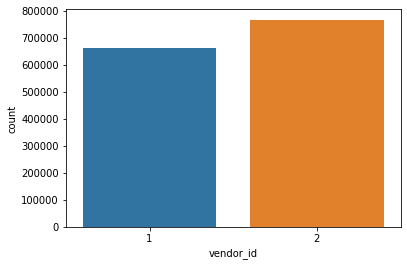

In [ ]:
sns.countplot(x='vendor_id',data=df)

We see that there is slight difference between the trips taken by both vendors

##Passenger Count

In [ ]:
df['passenger_count'].value_counts()

1    1011957
2     207050
5      76786
3      59032
6      47497
4      27985
0         14
9          1
Name: passenger_count, dtype: int64

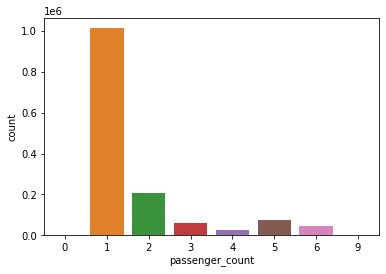

In [ ]:
sns.countplot(x='passenger_count',data=df)

1. we can see here there are 60 trip even with 0 passenger.
2. with passenger 7,8 and 9 have 3,1 and 1 trip
3. passenger count 1 has highest number of trip.


let's remove passenger count 0, 7, 8, 9

In [ ]:
df = df[df['passenger_count'] !=0]
df = df[df['passenger_count']<=6]

In [ ]:
df.passenger_count.value_counts()

1    1011957
2     207050
5      76786
3      59032
6      47497
4      27985
Name: passenger_count, dtype: int64

##Store and flag forward

In [ ]:
df.store_and_fwd_flag.value_counts()

N    1422485
Y       7822
Name: store_and_fwd_flag, dtype: int64

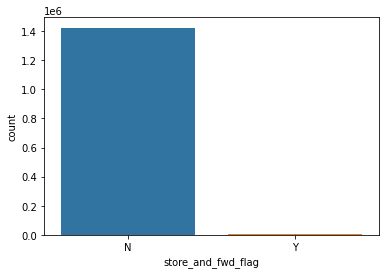

In [ ]:
sns.countplot(x='store_and_fwd_flag',data=df)

most of observation belongs to store_and_fwd_flag as no.

##Distance



In [ ]:
df.distance.value_counts()

0.000000     3956
0.001273        3
0.001273        2
1.317742        2
1.008660        2
             ... 
1.170960        1
4.757716        1
4.501123        1
10.470789       1
2.543480        1
Name: distance, Length: 1426338, dtype: int64

1. here we can see there are 5887 obs with 0 distance
2. The reasons for 0 km distance can be:

(a)The dropoff location couldn’t be tracked.
(b)The driver deliberately took this ride to complete a target ride number.
(c)The passengers canceled the trip.

**we will analyse these in bivariate analysis**

In [ ]:
df = df[df['distance']>0]

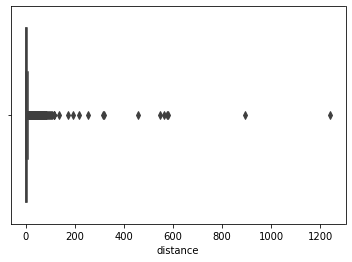

In [ ]:
sns.boxplot(df['distance'])

In [ ]:
df = df[df['distance']<60]

In [ ]:
df = df[df['distance']>0]

In [ ]:
df.shape

(1426289, 22)

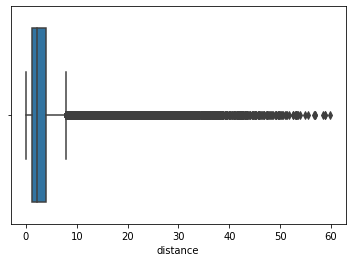

In [ ]:
sns.boxplot(df['distance'])

##Trips per day

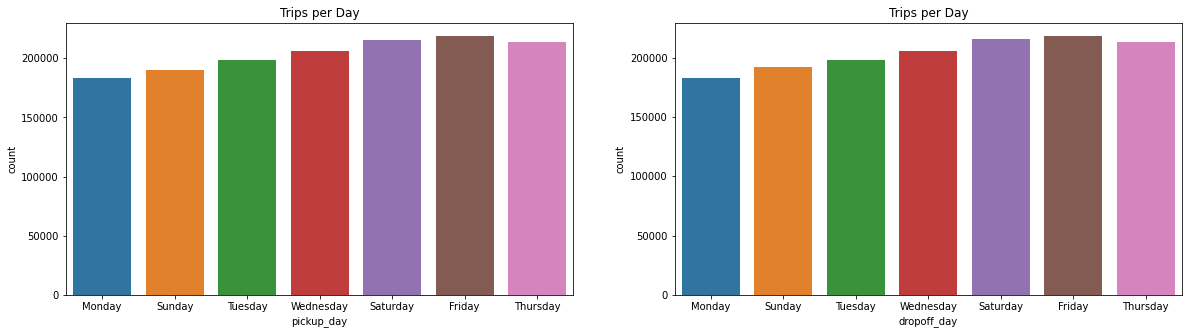

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Trips per Day')
ax1=sns.countplot(x="pickup_day",data=df,ax=ax1)
ax2.set_title('Trips per Day')
ax2=sns.countplot(x="dropoff_day",data=df,ax=ax2)

We see Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend.

##Trips per hour

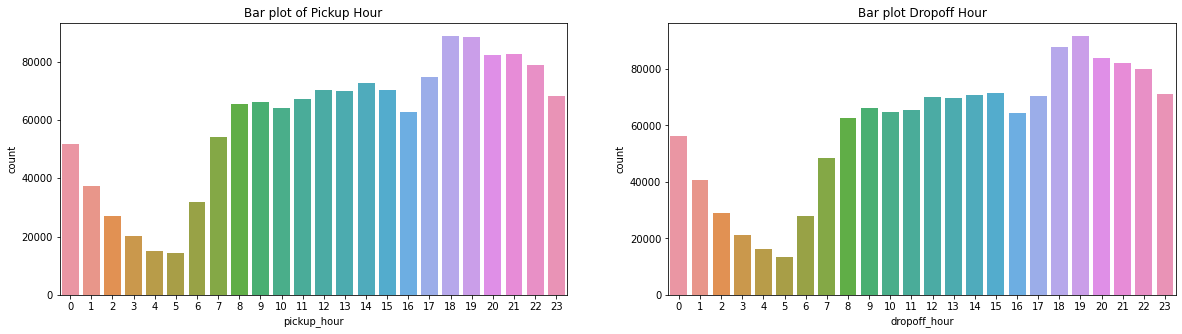

In [ ]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Bar plot of Pickup Hour')
ax3=sns.countplot(x='pickup_hour',data=df,ax=ax3)
ax4.set_title('Bar plot Dropoff Hour')
ax4 = sns.countplot(x='dropoff_hour',data=df,ax=ax4)

We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from works.

##Trips per Time of Day ( Morning, Afternoon, Evening and Night)

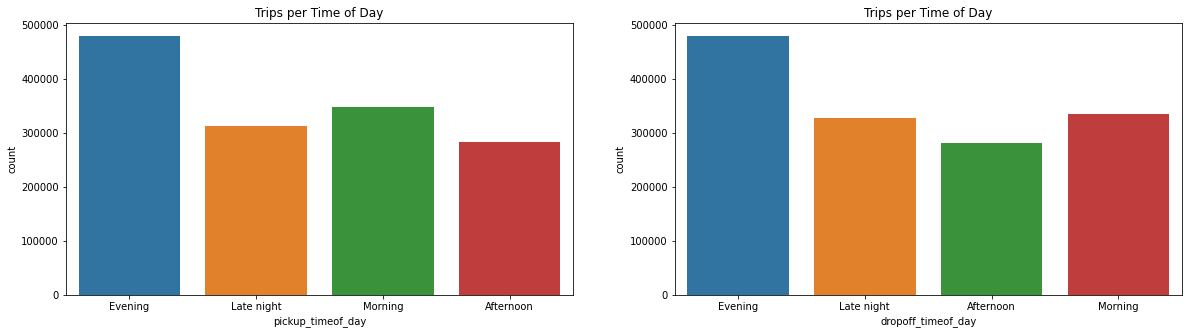

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Trips per Time of Day')
ax1=sns.countplot(x="pickup_timeof_day",data=df,ax=ax1)
ax2.set_title('Trips per Time of Day')
ax2=sns.countplot(x="dropoff_timeof_day",data=df,ax=ax2)

Evenings are the busiest

##Trips per month

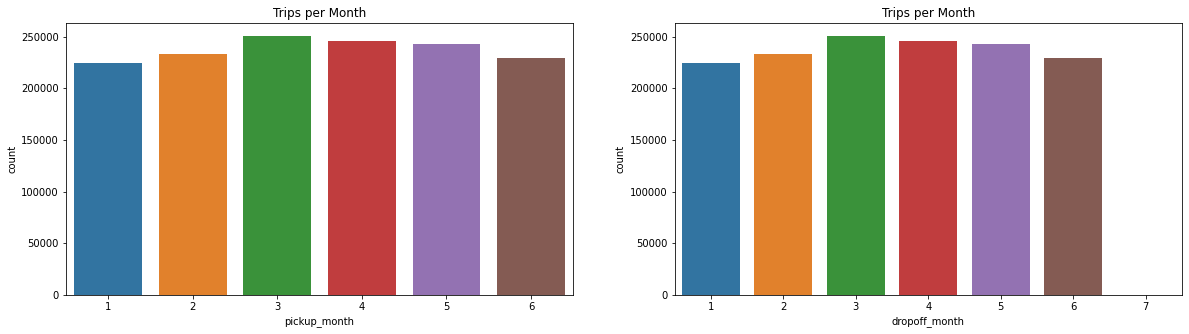

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Trips per Month')
ax1=sns.countplot(x="pickup_month",data=df,ax=ax1)
ax2.set_title('Trips per Month')
ax2=sns.countplot(x="dropoff_month",data=df,ax=ax2)

March is the busiest.

#Bivariate Analysis


Bivariate Analysis involves finding relationships, patterns, and correlations between two variables.

##Trip Duration per Vendor



Text(0.5, 1.0, 'Trip Duration per Vendor')

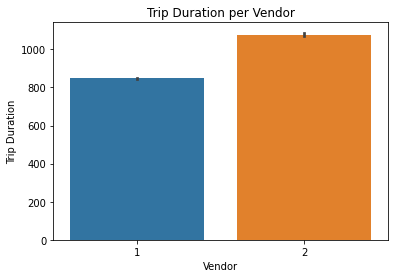

In [ ]:

sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)
plt.ylabel("Trip Duration")
plt.xlabel("Vendor")
plt.title("Trip Duration per Vendor")

Vendor id 2 takes longer trips as compare to vendor 1

##Trip Duration per Store and Forward Flag

<Figure size 576x360 with 0 Axes>

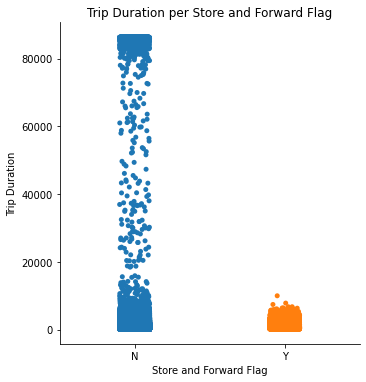

In [ ]:
plt.figure(figsize=(8,5))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind='strip')
plt.title("Trip Duration per Store and Forward Flag")
plt.ylabel("Trip Duration")
plt.xlabel("Store and Forward Flag")
plt.show()


Trip duration is generally longer for trips whose flag was not stored.

##Trip Duration per passenger count

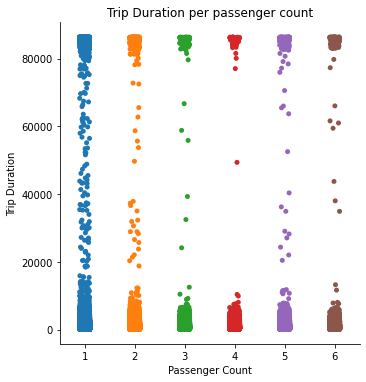

<Figure size 1080x720 with 0 Axes>

In [ ]:

sns.catplot(y='trip_duration',x='passenger_count',data=df,kind='strip')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration')
plt.title("Trip Duration per passenger count")
plt.figure(figsize=(15,10))
plt.show()

There is no visible relation between trip duration and passenger count

##Trip Duration per hour

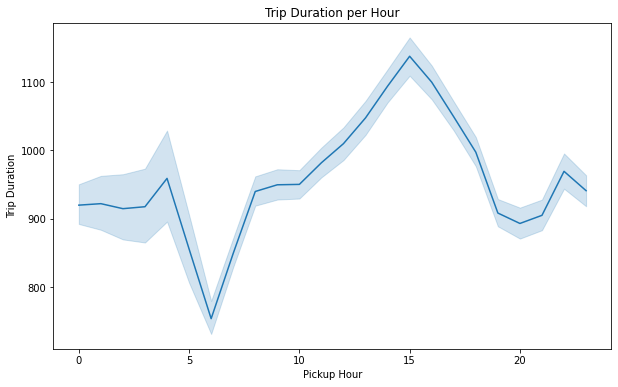

In [ ]:
figure,ax=plt.subplots(ncols=1,figsize=(10,6))
ax=sns.lineplot(x='pickup_hour',y='trip_duration',data=df)
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Duration')
plt.title("Trip Duration per Hour")
plt.show()

We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
Trip duration is the lowest around 6 am as streets may not be busy

## Trip duration per time of the day

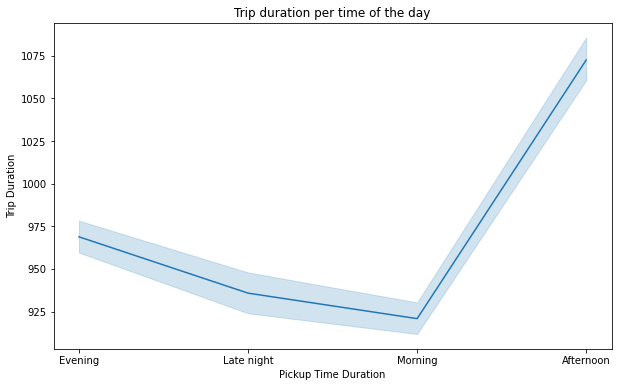

In [ ]:
figure,ax=plt.subplots(ncols=1,figsize=(10,6))
ax=sns.lineplot(x='pickup_timeof_day',y='trip_duration',data=df)
plt.xlabel('Pickup Time Duration')
plt.ylabel('Trip Duration')
plt.title("Trip duration per time of the day")
plt.show()


trip duration is the maximum in the afternoon and lowest between late night and morning.

##Trip Duration per Day of Week

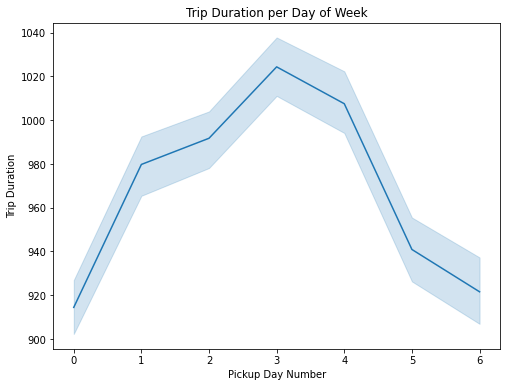

In [ ]:
figure,ax=plt.subplots(ncols=1,figsize=(8,6))
ax=sns.lineplot(x='pickup_day_no',y='trip_duration',data=df)
plt.xlabel('Pickup Day Number')
plt.ylabel('Trip Duration')
plt.title("Trip Duration per Day of Week")
plt.show()

Trip duration is the longest on Thursdays closely followed by Fridays.

##Trip Duration per month

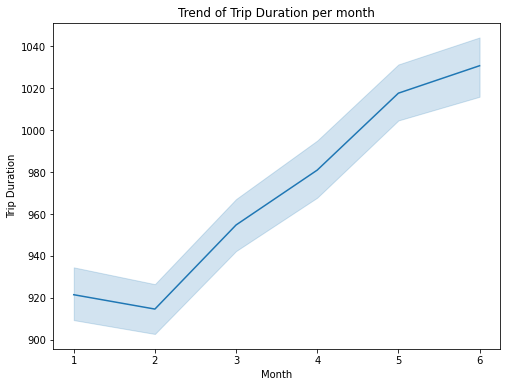

In [ ]:
figure,ax=plt.subplots(ncols=1,figsize=(8,6))
ax=sns.lineplot(x='pickup_month',y='trip_duration',data=df)
plt.xlabel('Month')
plt.ylabel('Trip Duration')
plt.title("Trend of Trip Duration per month")
plt.show()

From February, we can see trip duration rising every month.

##Distance and vendor

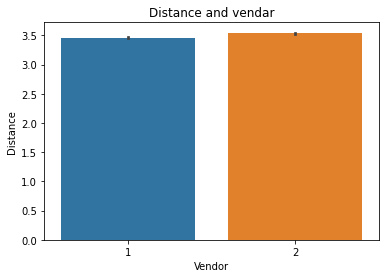

In [ ]:
figure,ax=plt.subplots(ncols=1)
ax=sns.barplot(x='vendor_id',y='distance',data=df,estimator=np.mean)
plt.xlabel('Vendor')
plt.ylabel('Distance')
plt.title("Distance and vendar")
plt.show()

Almost similar for both vendor id

##Distance and Store and Forward Flag

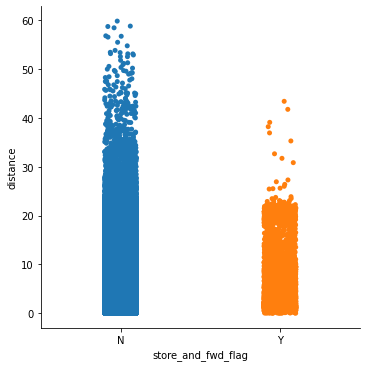

In [ ]:
sns.catplot(y='distance',x='store_and_fwd_flag',data=df,kind="strip")

We see for longer distances the trip is not stored.

##Distance per passenger count

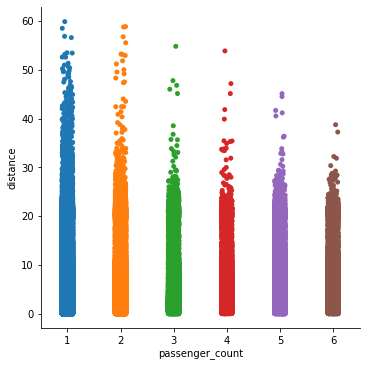

In [ ]:
sns.catplot(y='distance',x='passenger_count',data=df,kind="strip")

We see some of the longer distances are covered by either 1 or 2  passenger rides.

###Trend of distance with other variables.

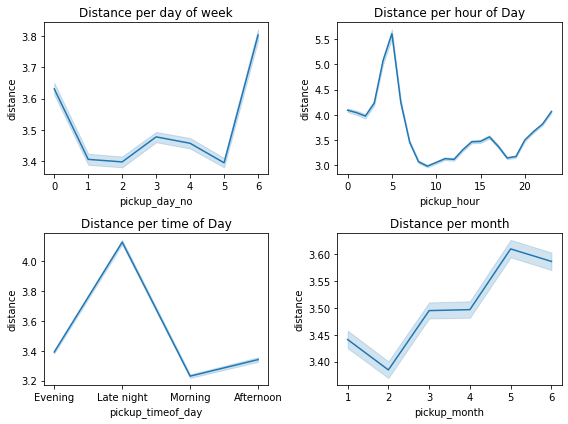

In [ ]:
figure, axis=plt.subplots(nrows=2,ncols=2,figsize=(8,6))
axis[0,0].set_title('Distance per day of week')
axis[0,0]=sns.lineplot(x="pickup_day_no",y='distance',data=df,ax=axis[0,0])

axis[0,1].set_title('Distance per hour of Day')
axis[0,1]=sns.lineplot(x="pickup_hour",y='distance',data=df,ax=axis[0,1])

axis[1,0].set_title("Distance per time of Day")
axis[1,0]=sns.lineplot(x=df['pickup_timeof_day'],y="distance",data=df,ax=axis[1,0])

axis[1,1].set_title("Distance per month")
axis[1,1]=sns.lineplot(x="pickup_month",y="distance",data=df,ax=axis[1,1])

plt.tight_layout()

1. Distances are longer on Sundays probably because it’s weekend.
Monday trip distances are also quite high.
This probably means that there can be outstation trips on these days and/or the streets are busier.
2. Distances are the longest around 5 am.
3. As seen above also, distances being the longest during late night or it maybe called as early morning too.
This can probably point to outstation trips where people start early for the day.
4. similarly trip distance is the lowest in February and the maximum in May.

### 1.Trip Duration and Distance
### 2.Passenger Count and Vendor id

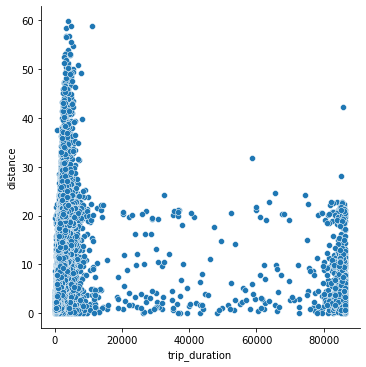

In [ ]:
sns.relplot(y='distance',x='trip_duration',data=df)

We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

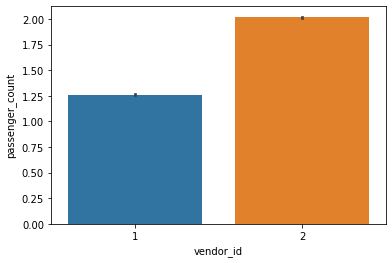

In [ ]:
sns.barplot(y='passenger_count',x='vendor_id',data=df)

 vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.

# Cleaning the data

In [ ]:
df.head()

id  vendor_id  ... dropoff_timeof_day  distance
0  id2875421          2  ...            Evening  1.498523
1  id2377394          1  ...         Late night  1.805510
2  id3858529          2  ...          Afternoon  6.385108
3  id3504673          2  ...            Evening  1.485501
4  id2181028          2  ...          Afternoon  1.188590

[5 rows x 22 columns]

In [ ]:
df.shape

(1426289, 22)

1. fix min and max latitude

3. lat-- 40.730610
   long ---73.935242


In [ ]:
df = df.loc[df['pickup_latitude'].between(40,42)]
df = df.loc[df['pickup_longitude'].between(-75,-72)]
df = df.loc[df['dropoff_latitude'].between(40,42)]
df = df.loc[df['dropoff_longitude'].between(-75,-72)]

In [ ]:
df.head()

id  vendor_id  ... dropoff_timeof_day  distance
0  id2875421          2  ...            Evening  1.498523
1  id2377394          1  ...         Late night  1.805510
2  id3858529          2  ...          Afternoon  6.385108
3  id3504673          2  ...            Evening  1.485501
4  id2181028          2  ...          Afternoon  1.188590

[5 rows x 22 columns]

In [ ]:
#Replacing Yes/No values with 1 and 0
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({"Y":1,"N":0}).astype(int)

In [ ]:
#dummy = pd.get_dummies(df.store_and_fwd_flag, prefix='flag')
#dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
#df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.vendor_id, prefix='vendor_id')
#dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.pickup_month, prefix='pickup_month')
#dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.pickup_day_no, prefix='pickup_day_no')
#dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.pickup_hour, prefix='pickup_hour')
#dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.passenger_count, prefix='passenger_count')
#dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

In [ ]:
df.head()

id  vendor_id  ... passenger_count_5 passenger_count_6
0  id2875421          2  ...                 0                 0
1  id2377394          1  ...                 0                 0
2  id3858529          2  ...                 0                 0
3  id3504673          2  ...                 0                 0
4  id2181028          2  ...                 0                 0

[5 rows x 67 columns]

###Now i have extracted the information from the below features variable and now we don't need them for further analysis

In [ ]:
del df['pickup_day']
del df['pickup_timeof_day']
del df['dropoff_day']
del df['pickup_month']
del df['dropoff_timeof_day']
del df['pickup_day_no']
del df['dropoff_day_no']
del df['pickup_hour']
del df['store_and_fwd_flag']
del df['passenger_count']
del df['dropoff_month']
del df['dropoff_hour']
del df['id']
del df['pickup_datetime']
del df['dropoff_datetime']
del df['vendor_id']

In [ ]:
df.shape

(1426285, 51)

In [ ]:
#Calculate Speed in km/h for further insights
df['speed'] = (df.distance/(df.trip_duration/3600))

# Correlation Analysis

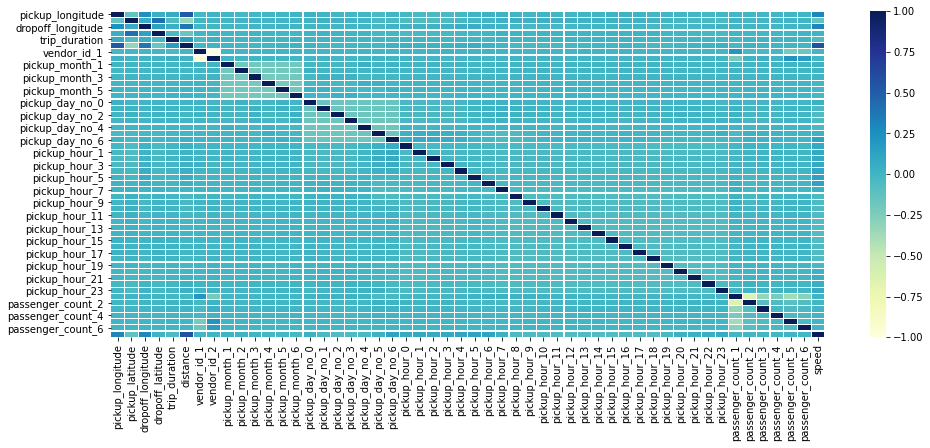

In [ ]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(16, 6))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

We can see that some of the feature variables have a high correlation among them. Therefore we have to take care of that. We can see clearly that the target variable 'trip duration' is not highly linearly related to the features variable.

## Target and independent variable

In [ ]:
#y = df['trip_duration']
y = np.log(df['trip_duration'])
x=df.drop(columns=['trip_duration'])

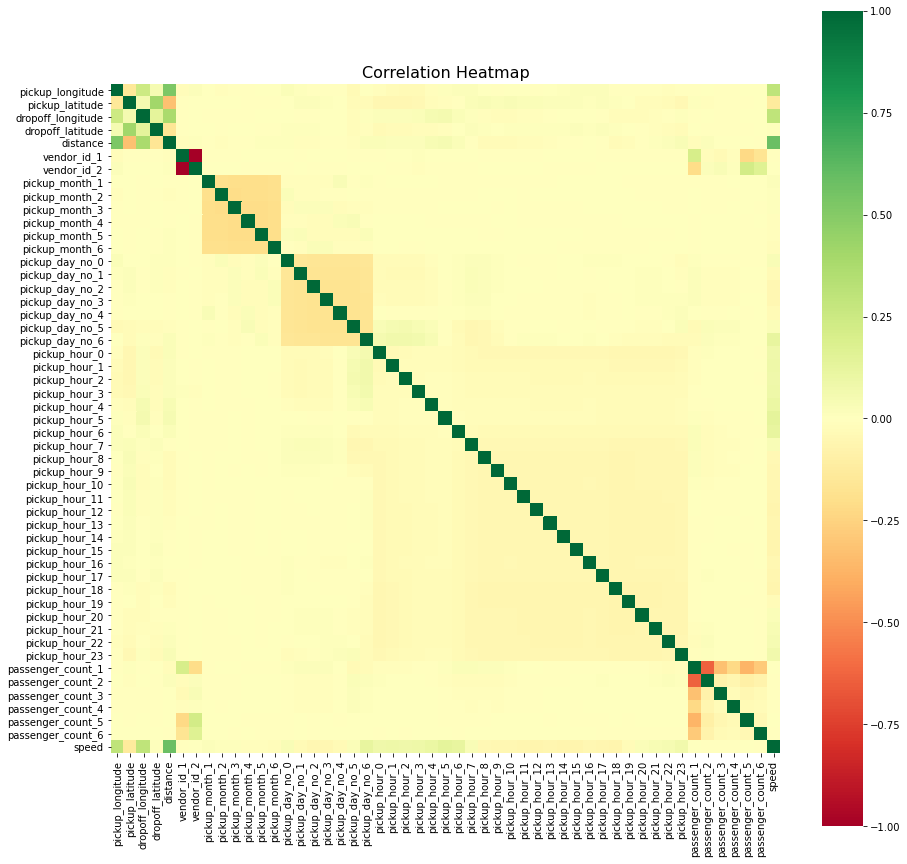

In [ ]:
plt.figure(figsize=(15,15))
corr = pd.DataFrame(x).corr()
corr.index = pd.DataFrame(x).columns
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

#Model building

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3, random_state=50)

##Linear regressiion

In [ ]:
std = StandardScaler()
X_train_std = std.fit_transform(x_train)
X_test_std = std.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg1 = LinearRegression()
lin_reg1.fit(X_train_std, y_train)

print(f'Coefficients: {lin_reg1.coef_}')
print(f'Intercept: {lin_reg1.intercept_}')
print(f'R^2 score: {lin_reg1.score(X_train_std, y_train)}')

Coefficients: [-9.48427185e-02  4.67600696e-02 -2.29748357e-02  9.07357502e-03
  7.88627928e-01 -9.16692234e+11 -9.16692234e+11 -3.19942281e+10
 -3.25290795e+10 -3.34460335e+10 -3.32185893e+10 -3.30380588e+10
 -3.22709373e+10  6.58043884e+10  6.80325566e+10  6.90958239e+10
  7.02891492e+10  7.07870244e+10  7.04178457e+10  6.67655686e+10
  8.89157742e+10  7.62222444e+10  6.49231394e+10  5.58803096e+10
  4.87944983e+10  4.72664144e+10  7.03715513e+10  9.09586686e+10
  9.92605918e+10  1.00048008e+11  9.83611642e+10  1.00543714e+11
  1.02723511e+11  1.02749262e+11  1.04481968e+11  1.02875917e+11
  9.74844283e+10  1.05907404e+11  1.14529403e+11  1.14420572e+11
  1.10780737e+11  1.10819476e+11  1.08449992e+11  1.01296853e+11
 -1.47999461e+10 -1.14462000e+10 -6.46734214e+09 -4.50053209e+09
 -7.33629022e+09 -5.82579451e+09 -4.19692725e-01]
Intercept: 6.512296171304252
R^2 score: 0.6623937903872233


In [ ]:
import statsmodels.api as sm

X_constant = sm.add_constant(X_train_std)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                 4.258e+04
Date:                Sun, 04 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:01:13   Log-Likelihood:            -5.4723e+05
No. Observations:              998399   AIC:                         1.095e+06
Df Residuals:                  998352   BIC:                         1.095e+06
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5123      0.000   1.55e+04      0.000       6.511       6.513
x1            -0.0948      0.001   -188.152      0.000      -0.096      -0.094
x2             0.0471      0.000     96.467      0.000       0.046       0.048
x3            -0.0229      0.000    -48.797      0.000      -0.024      -0.022
x4             0.0091      0.000     19.119      0.000       0.008       0.010
x5             0.7888      0.001   1224.595      0.000       0.787       0.790
x6            -0.0021      0.000     -9.353      0.000      -0.002      -0.002
x7             0.0021      0.000      9.353      0.000       0.002       0.002
x8            -0.0051      0.000    -14.520      0.000      -0.006      -0.004
x9            -0.0053      0.000    -15.123      0.000      -0.006      -0.005
x10           -0.0023      0.000     -6.653      0.000      -0.003      -0.002
x11            0.0024      0.000      6.907      0.000       0.002       0.003
x12            0.0045      0.000     13.030      0.000       0.004       0.005
x13            0.0057      0.000     16.171      0.000       0.005       0.006
x14           -0.0059      0.000    -16.200      0.000      -0.007      -0.005
x15            0.0031      0.000      8.509      0.000       0.002       0.004
x16            0.0051      0.000     14.039      0.000       0.004       0.006
x17            0.0049      0.000     13.692      0.000       0.004       0.006
x18            0.0008      0.000      2.372      0.018       0.000       0.002
x19           -0.0019      0.000     -5.288      0.000      -0.003      -0.001
x20           -0.0066      0.000    -17.746      0.000      -0.007      -0.006
x21            0.0077      0.000     18.830      0.000       0.007       0.008
x22            0.0063      0.000     15.351      0.000       0.006       0.007
x23            0.0043      0.000     10.325      0.000       0.003       0.005
x24            0.0049      0.000     11.794      0.000       0.004       0.006
x25            0.0039      0.000      9.346      0.000       0.003       0.005
x26           -0.0013      0.000     -3.164      0.002      -0.002      -0.001
x27           -0.0084      0.000    -20.333      0.000      -0.009      -0.008
x28           -0.0070      0.000    -17.226      0.000      -0.008      -0.006
x29           -0.0023      0.000     -5.665      0.000      -0.003      -0.001
x30            0.0014      0.000      3.447      0.001       0.001       0.002
x31            0.0017      0.000      4.163      0.000       0.001       0.002
x32            0.0016      0.000      4.098      0.000       0.001       0.002
x33            0.0014      0.000      3.433      0.001       0.001       0.002
x34           -0.0008      0.000     -2.090      0.037      -0.002    -5.2e-05
x35           -0.0024      0.000     -6.043      0.000      -0.003      -0.002
x3

In [ ]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

We’re all set, so onto the assumption testing!

###Linearity of the model
This assumes that there is a linear relationship between the predictors (e.g. independent variables or features) and the response variable (e.g. dependent variable or label). This also assumes that the predictors are additive.

**Why it can happen:** There may not just be a linear relationship among the data. Modeling is about trying to estimate a function that explains a process, and linear regression would not be a fitting estimator (pun intended) if there is no linear relationship.

**What it will affect:** The predictions will be extremely inaccurate because our model is underfitting. This is a serious violation that should not be ignored.

**How to detect it:** If there is only one predictor, this is pretty easy to test with a scatter plot. Most cases aren’t so simple, so we’ll have to modify this by using a scatter plot to see our predicted values versus the actual values (in other words, view the residuals). Ideally, the points should lie on or around a diagonal line on the scatter plot.

**How to fix it:** Either adding polynomial terms to some of the predictors or applying nonlinear transformations . If those do not work, try adding additional variables to help capture the relationship between the predictors and the label.

In [ ]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

In [ ]:
x_train.shape,y_train.shape

((998399, 51), (998399,))

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


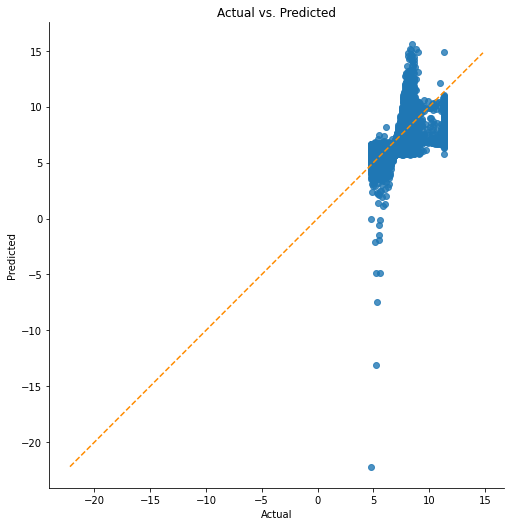

In [ ]:
linear_assumption(lin_reg,X_constant,y_train)

We can see in this case that there is not a perfect linear relationship.

###No Multicollinearity among Predictors
This assumes that the predictors used in the regression are not correlated with each other. This won’t render our model unusable if violated, but it will cause issues with the interpretability of the model.

**Why it can happen:** A lot of data is just naturally correlated. For example, if trying to predict a house price with square footage, the number of bedrooms, and the number of bathrooms, we can expect to see correlation between those three variables because bedrooms and bathrooms make up a portion of square footage.

**What it will affect:** Multicollinearity causes issues with the interpretation of the coefficients. Specifically, you can interpret a coefficient as “an increase of 1 in this predictor results in a change of (coefficient) in the response variable, holding all other predictors constant.” This becomes problematic when multicollinearity is present because we can’t hold correlated predictors constant. Additionally, it increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant.

**How to detect it:** There are a few ways, but we will use a heatmap of the correlation as a visual aid and examine the variance inflation factor (VIF).

**How to fix it:** This can be fixed by other removing predictors with a high variance inflation factor (VIF) or performing dimensionality reduction.

In [ ]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (20,12))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
            print('Assumption not satisfied')
            print()
            print('Coefficient interpretability will be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

In [ ]:
linear_feature_names = ['X'+str(feature+1) for feature in range(X_constant.shape[1])]

Assumption 3: Little to no multicollinearity among predictors


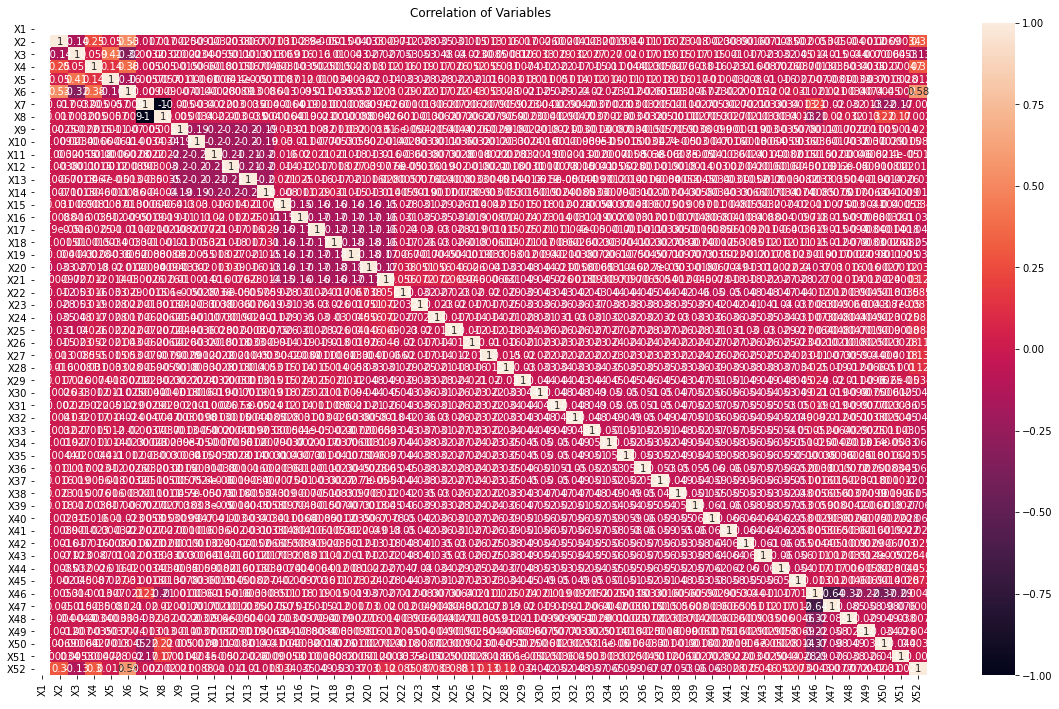

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 0.9999999999999845
X2: 1.447511847530974
X3: 1.3582440543566463
X4: 1.2597173786368652
X5: 1.2857840042549082
X6: 2.3636190602136966
X7: inf
X8: inf
X9: inf
X10: inf
X11: inf
X12: inf
X13: inf
X14: inf
X15: inf
X16: inf
X17: inf
X18: inf
X19: inf
X20: inf
X21: inf
X22: inf
X23: inf
X24: inf
X25: inf
X26: inf
X27: inf
X28: inf
X29: inf
X30: inf
X31: inf
X32: inf
X33: inf
X34: inf
X35: inf
X36: inf
X37: inf
X38: inf
X39: inf
X40: inf
X41: inf
X42: inf
X43: inf
X44: inf
X45: inf
X46: inf
X47: inf
X48: inf
X49: inf
X50: inf
X51: inf
X52: 1.8477375443832231

45 cases of possible multicollinearity
45 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [ ]:
multicollinearity_assumption(lin_reg,X_constant,y_train, feature_names=linear_feature_names)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
params = {"alpha": [1e-4, 1e-3, 1e-2, 1e2, 1e3, 1e4]}

In [ ]:
lasso_regressor = GridSearchCV(lasso, params, scoring="neg_root_mean_squared_error",cv=5)

In [ ]:

lasso_regressor.fit(X_train_std, y_train)

'''print(f'Coefficients: {lasso_regressor.coef_}')
print(f'Intercept: {lasso_regressor.intercept_}')
print(f'R^2 score: {lasso_regressor.score(z_train_std, y_train)}')'''

"print(f'Coefficients: {lasso_regressor.coef_}')\nprint(f'Intercept: {lasso_regressor.intercept_}')\nprint(f'R^2 score: {lasso_regressor.score(z_train_std, y_train)}')"

In [ ]:
lasso_regressor.best_score_

-0.41863350045300224

In [ ]:
lasso_best = lasso_regressor.best_estimator_

In [ ]:
lasso_best.fit(X_train_std,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

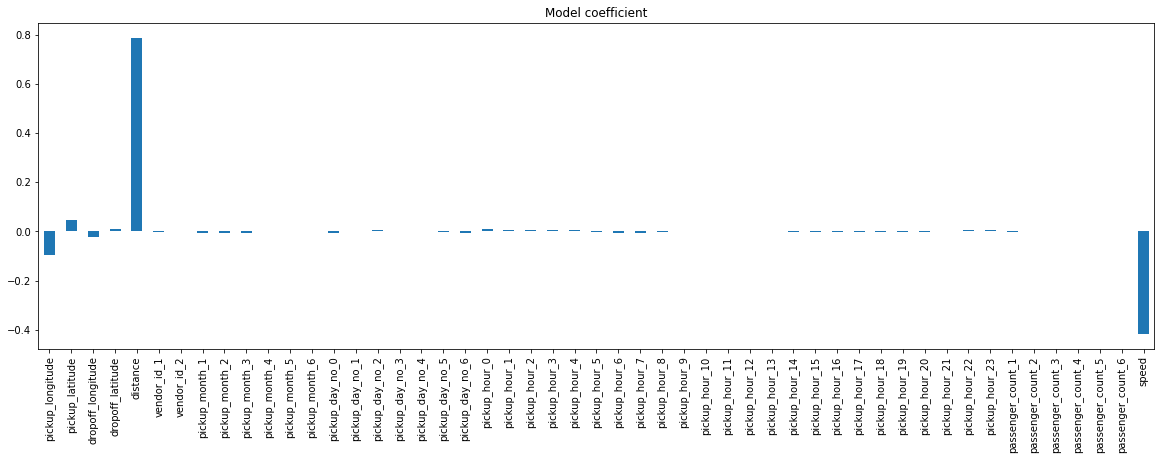

In [ ]:
plt.figure(figsize=(20,6))
coef = pd.Series(lasso_best.coef_,list(x_train.columns))
coef.plot(kind= 'bar', title='Model coefficient')

In [ ]:
print(f'Coefficients: {lasso_best.coef_}')
print(f'Intercept: {lasso_best.intercept_}')
print(f'R^2 score: {lasso_best.score(X_train_std, y_train)}')

Coefficients: [-9.46469403e-02  4.69219849e-02 -2.27400845e-02  8.90475690e-03
  7.88231134e-01 -3.98492968e-03  0.00000000e+00 -7.28490392e-03
 -7.49787995e-03 -4.55514306e-03  0.00000000e+00  2.15897018e-03
  3.37053567e-03 -6.67703907e-03  2.14853472e-03  4.12319437e-03
  3.96488229e-03 -0.00000000e+00 -2.64364650e-03 -7.29003087e-03
  8.22280200e-03  6.77973494e-03  4.64991074e-03  5.21355927e-03
  4.15120491e-03 -8.96539474e-04 -7.80892035e-03 -6.17028539e-03
 -1.39047134e-03  2.07634565e-03  2.34765774e-03  2.33925438e-03
  2.08811644e-03 -0.00000000e+00 -1.48999996e-03 -2.53580655e-03
 -3.96881974e-03 -9.85658441e-04 -7.74259458e-05 -2.99128340e-03
 -2.34909259e-03  1.80988579e-03  5.75595568e-03  7.08676303e-03
 -1.20274855e-03  1.04447158e-05  9.50637509e-04  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.19424721e-01]
Intercept: 6.512297049734317
R^2 score: 0.6623946114490622


In [ ]:
x_train.columns, x_train.shape

(Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
        'dropoff_latitude', 'distance', 'vendor_id_1', 'vendor_id_2',
        'pickup_month_1', 'pickup_month_2', 'pickup_month_3', 'pickup_month_4',
        'pickup_month_5', 'pickup_month_6', 'pickup_day_no_0',
        'pickup_day_no_1', 'pickup_day_no_2', 'pickup_day_no_3',
        'pickup_day_no_4', 'pickup_day_no_5', 'pickup_day_no_6',
        'pickup_hour_0', 'pickup_hour_1', 'pickup_hour_2', 'pickup_hour_3',
        'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6', 'pickup_hour_7',
        'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10', 'pickup_hour_11',
        'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14', 'pickup_hour_15',
        'pickup_hour_16', 'pickup_hour_17', 'pickup_hour_18', 'pickup_hour_19',
        'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22', 'pickup_hour_23',
        'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
        'passenger_count_4', 'passenger_count_5'

In [ ]:
col = ['vendor_id_1','pickup_month_1', 'pickup_month_2',
       'pickup_month_3', 'pickup_month_6',
       'pickup_day_no_0', 'pickup_day_no_2',
       'pickup_day_no_3', 'pickup_day_no_5',
       'pickup_day_no_6', 'pickup_hour_0', 'pickup_hour_1', 'pickup_hour_2',
       'pickup_hour_5',
       'pickup_hour_7', 'pickup_hour_10',
       'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14',
       'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22',
       'pickup_hour_23','passenger_count_1']

z = x_train.drop(col,axis=1)       

In [ ]:
X_test = x_test.drop(col,axis=1)

In [ ]:
z.shape , X_test.shape

((998399, 25), (427886, 25))

In [ ]:
std = StandardScaler()
z_train_std = std.fit_transform(z)
z_test_std = std.transform(X_test)

In [ ]:
import statsmodels.api as sm

Z_constant = sm.add_constant(z_train_std)
lin_reg = sm.OLS(y_train,Z_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                 7.802e+04
Date:                Sun, 04 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:09:58   Log-Likelihood:            -5.4866e+05
No. Observations:              998399   AIC:                         1.097e+06
Df Residuals:                  998373   BIC:                         1.098e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5123      0.000   1.55e+04      0.000       6.511       6.513
x1            -0.0961      0.001   -191.149      0.000      -0.097      -0.095
x2             0.0460      0.000     94.728      0.000       0.045       0.047
x3            -0.0224      0.000    -47.726      0.000      -0.023      -0.022
x4             0.0090      0.000     18.865      0.000       0.008       0.010
x5             0.7896      0.001   1232.769      0.000       0.788       0.791
x6             0.0040      0.000      9.179      0.000       0.003       0.005
x7             0.0040      0.000      9.313      0.000       0.003       0.005
x8             0.0059      0.000     13.698      0.000       0.005       0.007
x9             0.0029      0.000      6.853      0.000       0.002       0.004
x10            0.0013      0.000      3.129      0.002       0.000       0.002
x11            0.0036      0.000      8.602      0.000       0.003       0.004
x12            0.0029      0.000      6.921      0.000       0.002       0.004
x13           -0.0087      0.000    -20.497      0.000      -0.010      -0.008
x14           -0.0027      0.000     -6.430      0.000      -0.004      -0.002
x15            0.0007      0.000      1.654      0.098      -0.000       0.002
x16           -0.0046      0.000    -10.793      0.000      -0.005      -0.004
x17           -0.0060      0.000    -14.094      0.000      -0.007      -0.005
x18           -0.0031      0.000     -7.269      0.000      -0.004      -0.002
x19           -0.0022      0.000     -5.177      0.000      -0.003      -0.001
x20            0.0011      0.000      2.673      0.008       0.000       0.002
x21            0.0016      0.000      3.839      0.000       0.001       0.002
x22            0.0005      0.000      1.145      0.252      -0.000       0.001
x23            0.0006      0.000      1.314      0.189      -0.000       0.001
x24            0.0004      0.000      0.914      0.361      -0.000       0.001
x25           -0.4201      0.001   -776.116      0.000      -0.421      -0.419
==============================================================================
Omnibus:                   405388.988   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         60791994.015
Skew:                           0.899   Prob(JB):                         0.00
Kurtosis:                      41.185   Cond. No.                         2.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(z_train_std, y_train)

print(f'Coefficients: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')
print(f'R^2 score: {lr.score(z_train_std, y_train)}')

Coefficients: [-9.60750384e-02  4.60404933e-02 -2.24398081e-02  8.96295051e-03
  7.89589937e-01  4.03479342e-03  3.99573694e-03  5.87915413e-03
  2.92602323e-03  1.33542214e-03  3.64537709e-03  2.93382426e-03
 -8.71841149e-03 -2.73370062e-03  7.03620914e-04 -4.60478974e-03
 -5.99803826e-03 -3.09863236e-03 -2.20886535e-03  1.14200371e-03
  1.62611746e-03  4.82623095e-04  5.73178078e-04  3.93262434e-04
 -4.20095003e-01]
Intercept: 6.512297049734317
R^2 score: 0.6614298911652958


###Normality of the Error Terms
More specifically, this assumes that the error terms of the model are normally distributed. Linear regressions other than Ordinary Least Squares (OLS) may also assume normality of the predictors or the label, but that is not the case here.

**Why it can happen:** This can actually happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or outliers affecting our model.

**What it will affect:** A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.

**How to detect it:** There are a variety of ways to do so, but we’ll look at both a histogram and the p-value from the Anderson-Darling test for normality.

**How to fix it:** It depends on the root cause, but there are a few options. Nonlinear transformations of the variables, excluding specific variables (such as long-tailed variables), or removing outliers may solve this problem.



In [ ]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


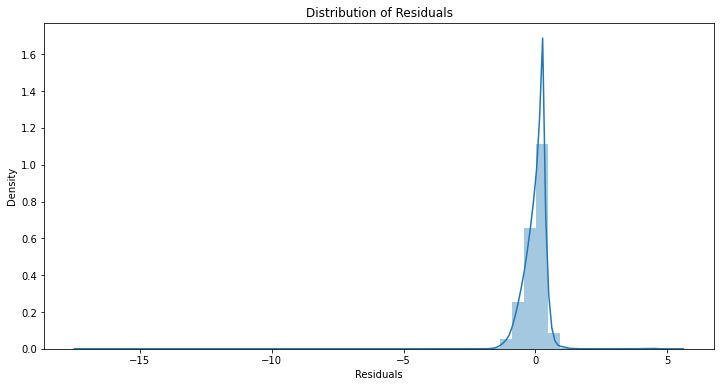


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
normal_errors_assumption(lin_reg,Z_constant,y_train)

###No Autocorrelation of the Error Terms
This assumes no autocorrelation of the error terms. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

**Why it can happen:** In a time series scenario, there could be information about the past that we aren’t capturing. In a non-time series scenario, our model could be systematically biased by either under or over predicting in certain conditions. Lastly, this could be a result of a violation of the linearity assumption.

**What it will affect:** This will impact our model estimates.

**How to detect it:** We will perform a Durbin-Watson test to determine if either positive or negative correlation is present. Alternatively, you could create plots of residual autocorrelations.

**How to fix it:** A simple fix of adding lag variables can fix this problem. Alternatively, interaction terms, additional variables, or additional transformations may fix this

In [ ]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 1.5< is positive autocorrelation')
    print('>2.5 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [ ]:
autocorrelation_assumption(lin_reg,Z_constant,y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 1.5< is positive autocorrelation
>2.5 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9992183795359815
Little to no autocorrelation 

Assumption satisfied


###Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.

**Why it can happen:** Our model may be giving too much weight to a subset of the data, particularly where the error variance was the largest.

**What it will affect:** Significance tests for coefficients due to the standard errors being biased. Additionally, the confidence intervals will be either too wide or too narrow.

**How to detect it:** Plot the residuals and see if the variance appears to be uniform.

**How to fix it:** Heteroscedasticity (can you tell I like the scedasticity words?) can be solved either by using weighted least squares regression instead of the standard OLS or transforming either the dependent or highly skewed variables. Performing a log transformation on the dependent variable is not a bad place to start.

In [ ]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


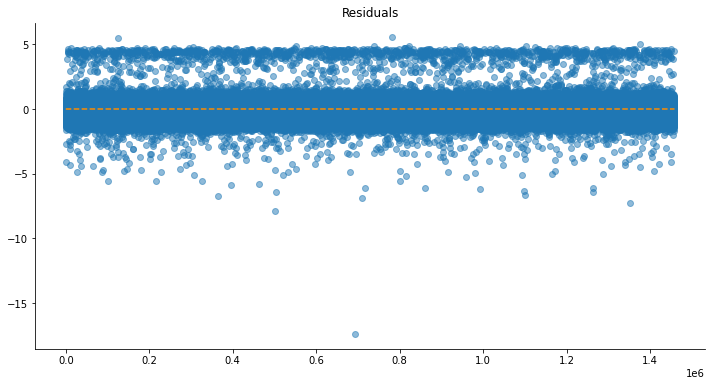

In [ ]:
homoscedasticity_assumption(lin_reg,Z_constant,y_train)

There don’t appear to be any obvious problems with that.

In [ ]:
lin_reg.resid.mean()

-4.208767183280586e-15

The results are a bit different, as far as I know, this is a numeric approximation issue. However, we can assume that the expectation of residuals is indeed 0.

###Model prediction
So now, our model has been fitted to the training set. It's time to predict the dependent variable. Let's do that now.

In [ ]:
y_pred_linear = lr.predict(z_test_std)

In [ ]:
dz1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_linear})
dz1

Actual  Predicted
21498    7.992607   7.286550
652096   6.167516   6.129898
1132549  7.301822   6.921704
164362   6.276643   6.159787
670666   6.192362   6.184760
...           ...        ...
380667   5.446737   6.147355
124764   7.002156   6.603579
770491   4.990433   5.839549
912700   5.030438   5.641543
984993   5.961005   6.231564

[427886 rows x 2 columns]

###Model evaluation
I will evaluate our model's accuracy through two suggested metrics for the regression models. i.e. RMSE and variance score. Where RMSE of 0 and variance of 1 is considered as the best score for a prediction model.

In [ ]:
#Evaluate the regressor on the data
print('RMSE score for the Multiple LR is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_linear))))
print('Variance score for the Multiple LR is : %.2f' % lr.score(z_test_std, y_test))
print("\n")

RMSE score for the Multiple LR is : 0.42073555634991666
Variance score for the Multiple LR is : 0.66




Root mean squared value is in acceptable range.
And the variance score which is also good.

##Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(random_state=1)

In [ ]:
regressor.fit(z,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

###Model prediction
So now, our model has been fitted to the training set. It's time to predict the dependent variable. Let's do that now.

In [ ]:
y_pred_DT= regressor.predict(X_test)

In [ ]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_DT})

Actual  Predicted
21498    7.992607   8.019613
652096   6.167516   6.169611
1132549  7.301822   7.301822
164362   6.276643   6.274762
670666   6.192362   6.190315
...           ...        ...
380667   5.446737   5.451038
124764   7.002156   7.069874
770491   4.990433   4.990433
912700   5.030438   5.030438
984993   5.961005   5.961005

[427886 rows x 2 columns]

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


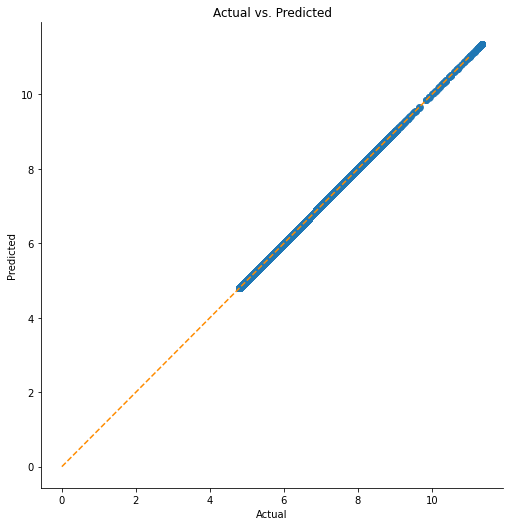

In [ ]:
linear_assumption(regressor,z,y_train)

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


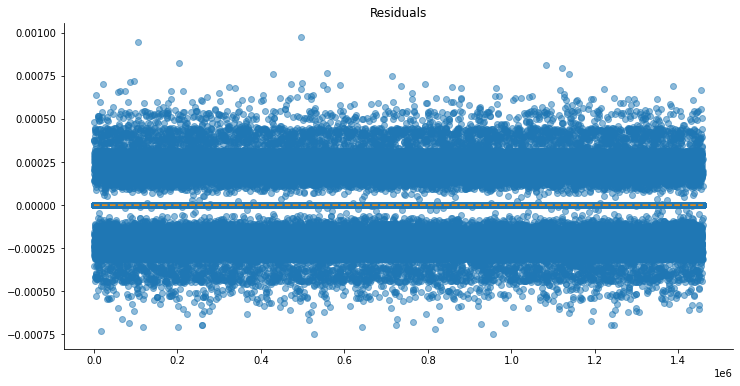

In [ ]:
homoscedasticity_assumption(regressor,z,y_train)

residual have constant variance

### Evaluation of the model

In [ ]:
#Evaluate the regressor on the data
print('RMSE score for the  Decision tree is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))))
print('Variance score for the  Decision tree is : %.4f' % regressor.score(X_test, y_test))
print("\n")

RMSE score for the Multiple Decision tree is : 0.011218690461249852
Variance score for the Multiple Decision tree is : 0.9998




Interesting find,
There is very significant improvement on the RMSE score for the Decision tree regressor over the Linear regressor.
Even the variance score is approx 1 which is a good score.

### optimization of model by Changing the max_depth

In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,12):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt_model.fit(z, y_train)
    train_accuracy.append(dt_model.score(z, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,12), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

max_depth  train_acc  valid_acc
0           1   0.399514   0.398015
1           2   0.558286   0.555450
2           3   0.710009   0.708168
3           4   0.814827   0.815193
4           5   0.886926   0.888077
5           6   0.937623   0.937955
6           7   0.964558   0.963998
7           8   0.980348   0.979781
8           9   0.988808   0.988242
9          10   0.994041   0.993626
10         11   0.996721   0.996318

No handles with labels found to put in legend.


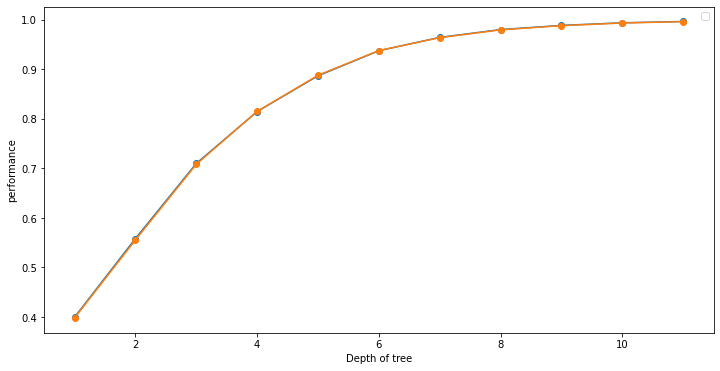

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

## Random forest

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(z,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

It took approx 6 minutes to train the model on dataset of more than 1 million records. It is evident that Random Forest model is slow to train on the high dimension datasets consisting of millions of records.

In [ ]:
y_pred_RF = rf.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_RF)

0.9999232795520452

Accuracy is high as compare to linear regression model

### Evaluation 

In [ ]:
#Evaluate the regressor on the data
print('RMSE score for the Random Forest is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))))
print('Variance score for the Random Forest is : %.2f' % rf.score(X_test, y_test))
print("\n")

RMSE score for the Random Forest is : 0.011218690461249852
Variance score for the Random Forest is : 1.00




In [ ]:
dz2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_RF})
dz2

Actual  Predicted
21498    7.992607   7.995149
652096   6.167516   6.166568
1132549  7.301822   7.301473
164362   6.276643   6.275757
670666   6.192362   6.192011
...           ...        ...
380667   5.446737   5.447764
124764   7.002156   7.015599
770491   4.990433   4.991166
912700   5.030438   5.030944
984993   5.961005   5.961722

[427886 rows x 2 columns]

#Comparing test results for the different regressor model:


In [ ]:
#Comparing test results for the and RF regressor
print("Total sum of difference between the actual and the predicted values for the MLR regressor is : %d"%np.abs(np.sum(np.subtract(y_test,y_pred_linear))))
print("Total sum of difference between the actual and the predicted values for the RF regressor is : %d"%np.abs(np.sum(np.subtract(y_test,y_pred_RF))))
print("Total sum of difference between the actual and the predicted values for the Decision tree regressor is : %d"%np.abs(np.sum(np.subtract(y_test,y_pred_DT))))

Total sum of difference between the actual and the predicted values for the MLR regressor is : 606
Total sum of difference between the actual and the predicted values for the RF regressor is : 0
Total sum of difference between the actual and the predicted values for the Decision tree regressor is : 6


Random forest proved to be much more efficient in predicting the output.